We build a neural network (NN) for predicting diabete status from personal and clinical information. We use the most fundamental architecture called a multilayer perceptron (MLP) or more generally a densely connected NN.
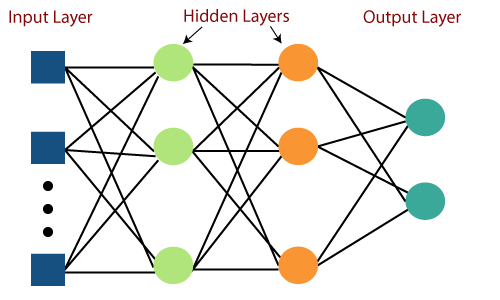

### Basic python and pandas
https://www.kaggle.com/lavanyashukla01/pandas-numpy-python-cheatsheet

https://www.utc.fr/~jlaforet/Suppl/python-cheatsheets.pdf

In [ ]:
# Pima Indians onset of diabetes dataset
# Medical record data for Pima Indians and whether they had an onset of diabetes within five years.
# https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv
# https://machinelearningmastery.com/develop-your-first-neural-network-with-pytorch-step-by-step/

# NumPy library to load your dataset
# PyTorch library for deep learning models.
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

# PyTorch TensorBoard support
from torch.utils.tensorboard import SummaryWriter
#import torchvision
#import torchvision.transforms as transforms

from datetime import datetime

import torchvision
import torchvision.transforms as transforms

In [ ]:
# load the dataset, split into input (X) and output (y) variables
### Input variables to be stored into X
# Number of times pregnant
# Plasma glucose concentration at 2 hours in an oral glucose tolerance test
# Diastolic blood pressure (mm Hg)
# Triceps skin fold thickness (mm)
# 2-hour serum insulin (μIU/ml)
# Body mass index (weight in kg/(height in m)2)
# Diabetes pedigree function
# Age (years)
### Output variable to be stored into y
# Class label (0 or 1)

dataset = np.loadtxt('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv', delimiter=',')
X = dataset[:,0:8]
y = dataset[:,8]

In [ ]:
print(dataset)

[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]


In [ ]:
print(y)

[1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1.

In [ ]:
# pytorch works with tensors, multi-dimensional matrices
# create a tensor out of NumPy arrays:
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

#y has been reshaped to ensure it's a single column
#print(y)

In [ ]:
# # Define the Linear Model (directly creating a NN model)
# model = nn.Sequential(
#     nn.Sigmoid())
# print(model)

Sequential(
  (0): Linear(in_features=8, out_features=12, bias=True)
  (1): Linear(in_features=12, out_features=8, bias=True)
  (2): Linear(in_features=8, out_features=1, bias=True)
  (3): Sigmoid()
)


In [ ]:
# Define the Model (directly creating a NN model)

# A model can be defined as a sequence of layers. You create a Sequential model with the layers listed out.
# The first layer must have the correct number of input features (in our case, 8).
# The model expects rows of data with 8 variables (the first argument at the first layer set to 8)
# The first hidden layer has 12 neurons, followed by a ReLU activation function
# The second hidden layer has 8 neurons, followed by another ReLU activation function
# The output layer has one neuron, followed by a sigmoid activation function
model = nn.Sequential(
    nn.Linear(8, 12),
    nn.ReLU(),
    nn.Linear(12, 8),
    nn.ReLU(),
    nn.Linear(8, 1),
    nn.Sigmoid())
print(model)

Sequential(
  (0): Linear(in_features=8, out_features=12, bias=True)
  (1): ReLU()
  (2): Linear(in_features=12, out_features=8, bias=True)
  (3): ReLU()
  (4): Linear(in_features=8, out_features=1, bias=True)
  (5): Sigmoid()
)


In [ ]:
# Goal of the training!
# The loss function is the metric to measure the prediction’s distance to.
# In this example, a binary cross entropy (BCE) is used
# The optimizer is the algorithm you use to adjust the model weights progressively to produce a better output.
loss_fn = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Training a Model
# Epoch: Passes the entire training dataset to the model once
# Batch: One or more samples passed to the model, from which the gradient descent algorithm will be executed for one iteration

n_epochs = 10
batch_size = 10

for epoch in range(n_epochs):
    for i in range(0, len(X), batch_size):
        # Every data instance is an input + label pair
        Xbatch = X[i:i+batch_size]
        ybatch = y[i:i+batch_size]

        # Make predictions for this batch
        y_pred = model(Xbatch)

        # Compute the loss and its gradients
        loss = loss_fn(y_pred, ybatch)
        optimizer.zero_grad()
        loss.backward()

        # Adjust learning weights
        optimizer.step()

    full_y_pred = model(X)
    accuracy = (full_y_pred.round() == y).float().mean()

    print(f'Finished epoch {epoch}, latest loss {loss}, accuracy on training data {accuracy}')

Finished epoch 0, latest loss 0.6575183272361755, accuracy on training data 0.5768229365348816
Finished epoch 1, latest loss 0.5171467661857605, accuracy on training data 0.6484375
Finished epoch 2, latest loss 0.5070503354072571, accuracy on training data 0.66796875
Finished epoch 3, latest loss 0.4918139576911926, accuracy on training data 0.6744791865348816
Finished epoch 4, latest loss 0.48338550329208374, accuracy on training data 0.6848958134651184
Finished epoch 5, latest loss 0.4737917184829712, accuracy on training data 0.6875
Finished epoch 6, latest loss 0.4717229902744293, accuracy on training data 0.6848958134651184
Finished epoch 7, latest loss 0.47163671255111694, accuracy on training data 0.6953125
Finished epoch 8, latest loss 0.46545666456222534, accuracy on training data 0.6927083134651184
Finished epoch 9, latest loss 0.46693190932273865, accuracy on training data 0.7005208134651184


In [ ]:
# compute the overall, final compute accuracy (no_grad is optional)
with torch.no_grad():
    y_pred = model(X)

accuracy = (y_pred.round() == y).float().mean()
print(f"Accuracy {accuracy}")

Accuracy 0.7005208134651184


In [ ]:
# make class predictions. this is the same as simply rounding it because of a binary class situation
predictions = (model(X) > 0.5).int()
for i in range(5):
    print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

[6.0, 148.0, 72.0, 35.0, 0.0, 33.599998474121094, 0.6269999742507935, 50.0] => 0 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.600000381469727, 0.35100001096725464, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.299999237060547, 0.671999990940094, 32.0] => 1 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.100000381469727, 0.16699999570846558, 21.0] => 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.099998474121094, 2.2880001068115234, 33.0] => 0 (expected 1)
